* Robert Pearson
* Final Project
* Version 1
* Spring 2024 - DS160

# Can an Airline Company predict customer satisfaction?
## Airline Custoner Satisfaction Analysis with Logistic Regression

### Importing the libraries

In [1]:
import numpy as np
import seaborn as sns
import math
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset

In [2]:
dataset=pd.read_csv("Invistico_Airline.csv")

In [3]:
dataset.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [4]:
dataset.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


## Dataset Preprocessing
- missing values in Arrive delay in minutes, will be imputing the missing data with the mean

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [6]:
dataset.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [10]:
ardm_mean=dataset['Arrival Delay in Minutes'].mean() 

In [11]:
dataset['Arrival Delay in Minutes'].fillna(ardm_mean, inplace=True)

In [12]:
dataset.isnull().sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

- dependent variable "satisfaction" seems to be relatively distributed among the whole data set

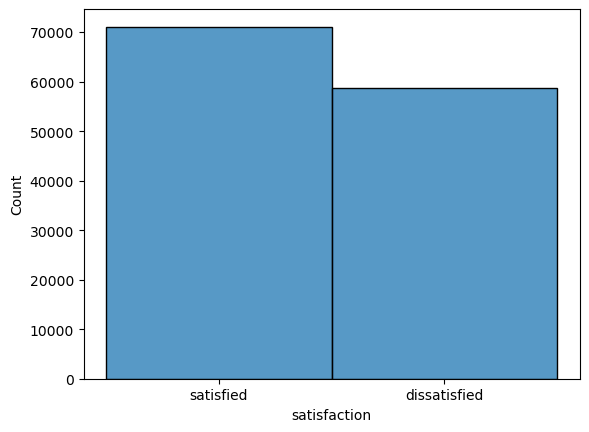

In [13]:
sns.histplot(x="satisfaction", data=dataset)
plt.show()

- strong correlation between variables that the consumer ranked themselves

C:\Users\rober\AppData\Local\Temp\ipykernel_91276\3152029497.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


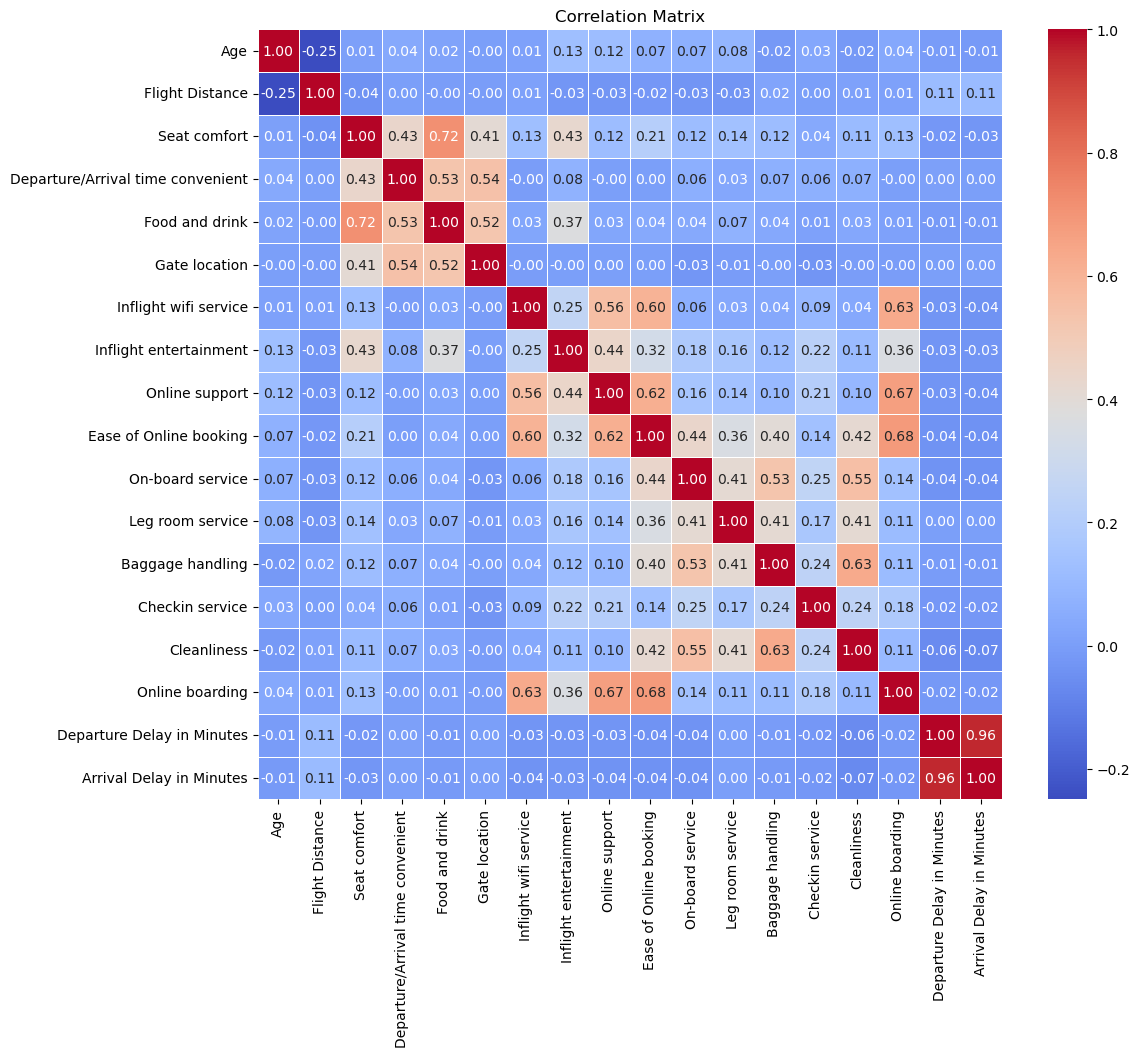

In [14]:
corr_matrix = dataset.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

## Logistic Regression Modeling

### Create independent and dependent variables to predict with all features

In [16]:
X=dataset.drop('satisfaction', axis=1)
y=dataset[['satisfaction']]

In [17]:
X.sample()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
70300,Loyal Customer,24,Business travel,Eco Plus,2378,2,1,1,1,2,...,1,2,2,3,3,4,3,2,8,16.0


#### Categorical Variables to numbers (customer type, type of travel, and class)

In [18]:
X=pd.get_dummies(X, drop_first=True)

In [19]:
X.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,65,265,0,0,0,2,2,4,2,3,...,3,5,3,2,0,0.0,0,1,1,0
1,47,2464,0,0,0,3,0,2,2,3,...,4,2,3,2,310,305.0,0,1,0,0
2,15,2138,0,0,0,3,2,0,2,2,...,4,4,4,2,0,0.0,0,1,1,0
3,60,623,0,0,0,3,3,4,3,1,...,1,4,1,3,0,0.0,0,1,1,0
4,70,354,0,0,0,3,4,3,4,2,...,2,4,2,5,0,0.0,0,1,1,0


## All twenty-one (21) raw features with 80/20 split for train, and test

### Splitting the dataset into the Training set and Test set

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.2, random_state=42)

### Training the Logistic Regression model 

In [21]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(max_iter=150000)
classifier.fit(X_train.values, y_train.values.ravel())

LogisticRegression(max_iter=150000)

### Model Performance check using Confusion matrix, Confusion matrix display and classification report

In [22]:
y_pred=classifier.predict(X_test.values)

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[ 9453  2222]
 [ 2255 12046]]


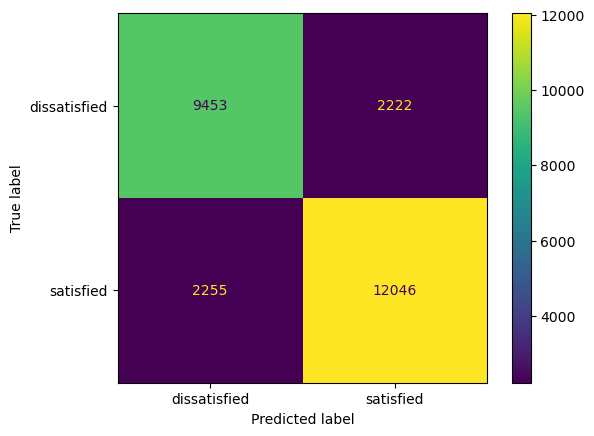

In [24]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm, 
                            display_labels=classifier.classes_)
disp.plot()
plt.show()

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

dissatisfied       0.81      0.81      0.81     11675
   satisfied       0.84      0.84      0.84     14301

    accuracy                           0.83     25976
   macro avg       0.83      0.83      0.83     25976
weighted avg       0.83      0.83      0.83     25976



- True Positives (TP): These are instances where the model correctly predicts that a customer is satisfied, and in reality, they are satisfied. (12046)
- False Positives (FP): These are instances where the model incorrectly predicts that a customer is satisfied, but in reality, they are dissatisfied. (2222)
- True Negatives (TN): These are instances where the model correctly predicts that a customer is dissatisfied, and in reality, they are dissatisfied. (9453)
- False Negatives (FN): These are instances where the model incorrectly predicts that a customer is dissatisfied, but in reality, they are satisfied. (2255)


## All twenty-one (21) raw features with 70/30 split for train, and test

### Splitting the dataset into the Training set and Test set

In [26]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.3, random_state=42)

### Training the Logistic Regression model 

In [27]:
classifier=LogisticRegression(max_iter=150000)
classifier.fit(X_train.values, y_train.values.ravel())

LogisticRegression(max_iter=150000)

In [28]:
y_train.head()

,satisfaction
18386,satisfied
115613,satisfied
68138,dissatisfied
78244,dissatisfied
34472,dissatisfied


### Model Performance check using Confusion matrix, Confusion matrix display and classification report

In [29]:
y_pred=classifier.predict(X_test.values)

In [30]:
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[14205  3349]
 [ 3413 17997]]


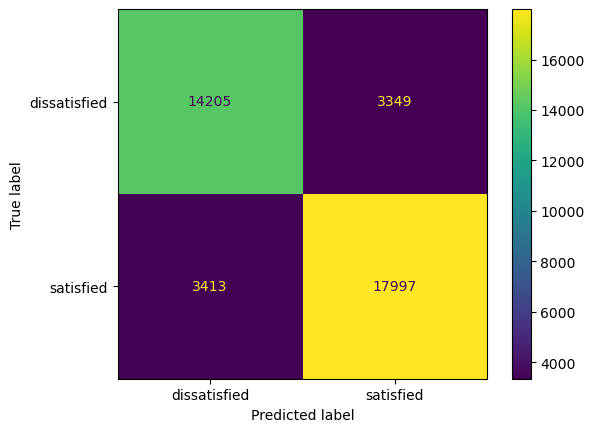

In [31]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm, 
                            display_labels=classifier.classes_)
disp.plot()
plt.show()

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

dissatisfied       0.81      0.81      0.81     17554
   satisfied       0.84      0.84      0.84     21410

    accuracy                           0.83     38964
   macro avg       0.82      0.82      0.82     38964
weighted avg       0.83      0.83      0.83     38964



- True Positives (TP): These are instances where the model correctly predicts that a customer is satisfied, and in reality, they are satisfied. (17997)
- False Positives (FP): These are instances where the model incorrectly predicts that a customer is satisfied, but in reality, they are dissatisfied. (3349)
- True Negatives (TN): These are instances where the model correctly predicts that a customer is dissatisfied, and in reality, they are dissatisfied. (14205)
- False Negatives (FN): These are instances where the model incorrectly predicts that a customer is dissatisfied, but in reality, they are satisfied. (3414)


## All fourteen (14) raw features with 80/20 split for train, and test

### Create independent and dependent variables to predict 
- For this model, variables that the customer ranks on a scale of 1-5 are being used

In [33]:
X=dataset.drop(columns=['satisfaction', 'Customer Type','Age', 'Type of Travel', 'Class', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'],  axis=1)
y=dataset[['satisfaction']]

In [34]:
X.sample()

,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
89748,1,1,1,1,2,5,4,4,4,4,4,4,4,3


### Splitting the dataset into the Training set and Test set

In [35]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.2, random_state=42)

In [36]:
classifier=LogisticRegression(max_iter=150000)
classifier.fit(X_train.values, y_train.values.ravel())

LogisticRegression(max_iter=150000)

In [37]:
y_pred=classifier.predict(X_test.values)

In [38]:
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[ 9137  2538]
 [ 2417 11884]]


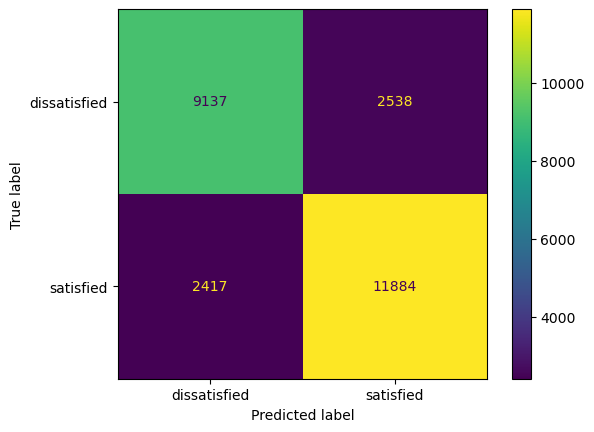

In [39]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm, 
                            display_labels=classifier.classes_)
disp.plot()
plt.show()

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

dissatisfied       0.79      0.78      0.79     11675
   satisfied       0.82      0.83      0.83     14301

    accuracy                           0.81     25976
   macro avg       0.81      0.81      0.81     25976
weighted avg       0.81      0.81      0.81     25976



- True Positives (TP): These are instances where the model correctly predicts that a customer is satisfied, and in reality, they are satisfied. (11884)
- False Positives (FP): These are instances where the model incorrectly predicts that a customer is satisfied, but in reality, they are dissatisfied. (2538)
- True Negatives (TN): These are instances where the model correctly predicts that a customer is dissatisfied, and in reality, they are dissatisfied. (9137)
- False Negatives (FN): These are instances where the model incorrectly predicts that a customer is dissatisfied, but in reality, they are satisfied. (2417)


### All fourteen (14) raw features with 70/30 split for train, and test

In [41]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.3, random_state=42)

In [42]:
classifier=LogisticRegression(max_iter=150000)
classifier.fit(X_train.values, y_train.values.ravel())

LogisticRegression(max_iter=150000)

In [43]:
y_pred=classifier.predict(X_test.values)

In [44]:
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[13725  3829]
 [ 3707 17703]]


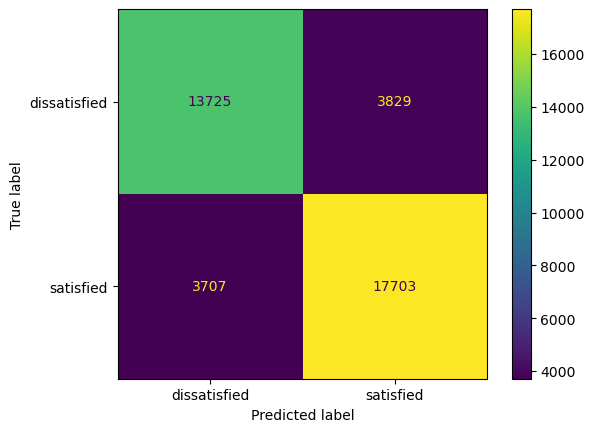

In [45]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm, 
                            display_labels=classifier.classes_)
disp.plot()
plt.show()

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

dissatisfied       0.79      0.78      0.78     17554
   satisfied       0.82      0.83      0.82     21410

    accuracy                           0.81     38964
   macro avg       0.80      0.80      0.80     38964
weighted avg       0.81      0.81      0.81     38964



- True Positives (TP): These are instances where the model correctly predicts that a customer is satisfied, and in reality, they are satisfied. (11703)
- False Positives (FP): These are instances where the model incorrectly predicts that a customer is satisfied, but in reality, they are dissatisfied. (3829)
- True Negatives (TN): These are instances where the model correctly predicts that a customer is dissatisfied, and in reality, they are dissatisfied. (13725)
- False Negatives (FN): These are instances where the model incorrectly predicts that a customer is dissatisfied, but in reality, they are satisfied. (3707)


### ROC and AUC curve

#### ROC and AUC curve for models with 21 features

In [47]:
X=dataset.drop('satisfaction', axis=1)
y=dataset[['satisfaction']]

In [48]:
X=pd.get_dummies(X, drop_first=True)
X.sample()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
102957,57,1149,4,1,1,1,4,4,4,4,...,2,5,2,4,0,0.0,0,0,1,0


In [49]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.2, random_state=42)

In [50]:
classifier=LogisticRegression(max_iter=150000)
classifier.fit(X_train.values, y_train.values.ravel())

LogisticRegression(max_iter=150000)

In [51]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encode labels in y_test
y_test_encoded = label_encoder.fit_transform(y_test)

# Reshape y_test_encoded to a 1D array
y_test_encoded = y_test_encoded.ravel()

C:\Users\rober\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
y_test_encoded

array([1, 0, 1, ..., 1, 1, 1])

In [53]:
classifier.predict(X_test )

C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array(['satisfied', 'dissatisfied', 'satisfied', ..., 'satisfied',
       'dissatisfied', 'satisfied'], dtype=object)

In [54]:
y_pred_proba=classifier.predict_proba(X_test)[:,1]
y_pred_proba[0]

C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.9261993404813588

In [55]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)

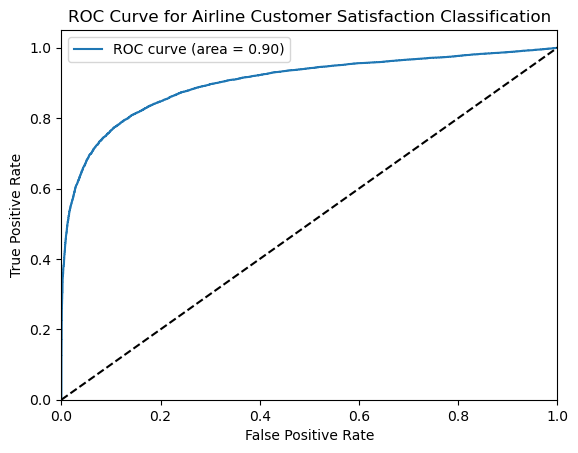

In [56]:
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Airline Customer Satisfaction Classification')
plt.legend()
plt.show()

C:\Users\rober\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


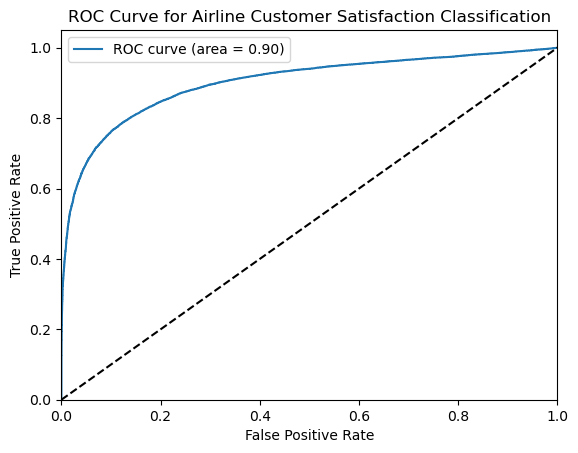

In [84]:
X=dataset.drop('satisfaction', axis=1)
y=dataset[['satisfaction']]
X=pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.3, random_state=42)
classifier=LogisticRegression(max_iter=150000)
classifier.fit(X_train.values, y_train.values.ravel())
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Encode labels in y_test
y_test_encoded = label_encoder.fit_transform(y_test)
# Reshape y_test_encoded to a 1D array
y_test_encoded = y_test_encoded.ravel()
y_pred_proba=classifier.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Airline Customer Satisfaction Classification')
plt.legend()
plt.show()

- Curve for both test sizes for model with all 21 features is identical

#### ROC and AUC curve for models with 14 features

C:\Users\rober\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


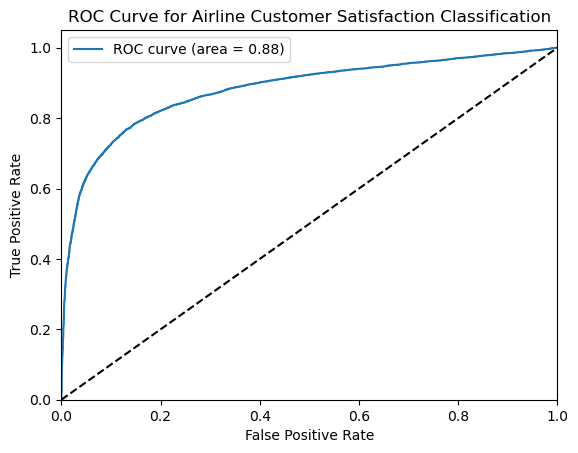

In [89]:
X=dataset.drop(columns=['satisfaction', 'Customer Type','Age', 'Type of Travel', 'Class', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'],  axis=1)
y=dataset[['satisfaction']]
X=pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.2, random_state=42)
classifier=LogisticRegression(max_iter=150000)
classifier.fit(X_train.values, y_train.values.ravel())
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Encode labels in y_test
y_test_encoded = label_encoder.fit_transform(y_test)
# Reshape y_test_encoded to a 1D array
y_test_encoded = y_test_encoded.ravel()
y_pred_proba=classifier.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Airline Customer Satisfaction Classification')
plt.legend()
plt.show()

C:\Users\rober\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


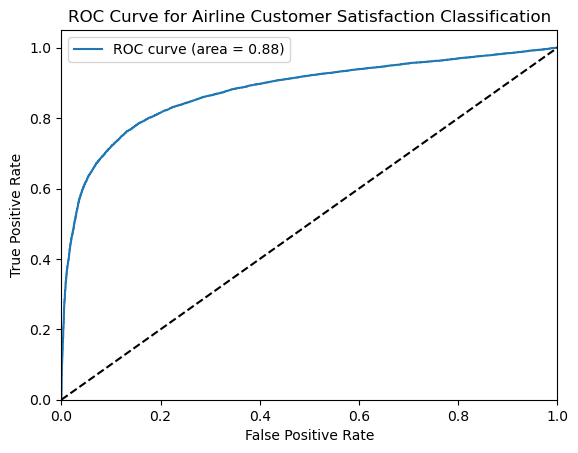

In [88]:
X=dataset.drop(columns=['satisfaction', 'Customer Type','Age', 'Type of Travel', 'Class', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'],  axis=1)
y=dataset[['satisfaction']]
X=pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.3, random_state=42)
classifier=LogisticRegression(max_iter=150000)
classifier.fit(X_train.values, y_train.values.ravel())
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Encode labels in y_test
y_test_encoded = label_encoder.fit_transform(y_test)
# Reshape y_test_encoded to a 1D array
y_test_encoded = y_test_encoded.ravel()
y_pred_proba=classifier.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Airline Customer Satisfaction Classification')
plt.legend()
plt.show()

- Curve for both test sizes for model with 14 features is identical as well.